# Importing Libraries

In [41]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta

# 1.Fetching the Data

### Fetch historical COVID-19 data

In [42]:
url = "https://disease.sh/v3/covid-19/historical/ZAF?lastdays=all"
response = requests.get(url)
data = response.json()

### Convert to DataFrame

In [43]:
timeline = data['timeline']
df = pd.DataFrame({
    'date': pd.to_datetime(list(timeline['cases'].keys())),
    'cases': list(timeline['cases'].values()),
    'deaths': list(timeline['deaths'].values()),
    'recovered': list(timeline['recovered'].values())
})

print("South African COVID-19 Data Overview:")
print(df.head())
print(f"\nData from {df['date'].min().date()} to {df['date'].max().date()}")

South African COVID-19 Data Overview:
        date  cases  deaths  recovered
0 2020-01-22      0       0          0
1 2020-01-23      0       0          0
2 2020-01-24      0       0          0
3 2020-01-25      0       0          0
4 2020-01-26      0       0          0

Data from 2020-01-22 to 2023-03-09


C:\Users\Capaciti\AppData\Local\Temp\ipykernel_20304\1171310788.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  'date': pd.to_datetime(list(timeline['cases'].keys())),


# 2.Data Analysis

### Calculating daily new cases and deaths

In [44]:
df['new_cases'] = df['cases'].diff()
df['new_deaths'] = df['deaths'].diff()

### Calculating 7-day moving averages

In [45]:
if 'recoveries' not in df.columns:
	df['recoveries'] = df['cases'] - df['deaths']

df['new_cases_7day_avg'] = df['new_cases'].rolling(window=7).mean()
df['new_deaths_7day_avg'] = df['new_deaths'].rolling(window=7).mean()
df['recoveries_7day_avg'] = df['recoveries'].rolling(window=7).mean()

#### New Cases

In [46]:
print("Daily New Cases:")
print(df[['date', 'new_cases']].tail())

Daily New Cases:
           date  new_cases
1138 2023-03-05        0.0
1139 2023-03-06      968.0
1140 2023-03-07      187.0
1141 2023-03-08      597.0
1142 2023-03-09      426.0


#### New Deaths

In [58]:
print("Daily New Deaths:")
print(df[['date', 'new_deaths']].tail())

Daily New Deaths:
           date  new_deaths
1138 2023-03-05         0.0
1139 2023-03-06         0.0
1140 2023-03-07         0.0
1141 2023-03-08         0.0
1142 2023-03-09         0.0


#### Case fatality rate

In [47]:
df['case_fatality_rate'] = (df['deaths'] / df['cases']) * 100

#### Recoviries

In [48]:
df['recoveries'] = df['cases'] - df['deaths']
print(df[['date', 'recoveries']])


           date  recoveries
0    2020-01-22           0
1    2020-01-23           0
2    2020-01-24           0
3    2020-01-25           0
4    2020-01-26           0
...         ...         ...
1138 2023-03-05     3962294
1139 2023-03-06     3963262
1140 2023-03-07     3963449
1141 2023-03-08     3964046
1142 2023-03-09     3964472

[1143 rows x 2 columns]


### Recent statistics

In [49]:
latest = df.iloc[-1]
print(f"\nLatest COVID-19 Statistics for South Africa (as of {latest['date'].date()}):")
print(f"Total cases: {latest['cases']:,}")
print(f"Total deaths: {latest['deaths']:,}")
print(f"Case fatality rate: {latest['case_fatality_rate']:.2f}%")
print(f"Total recoveries: {latest['recoveries']:,}")
print(f"New cases today: {latest['new_cases']:.0f}")



Latest COVID-19 Statistics for South Africa (as of 2023-03-09):
Total cases: 4,067,067
Total deaths: 102,595
Case fatality rate: 2.52%
Total recoveries: 3,964,472
New cases today: 426


# 3.Visualization

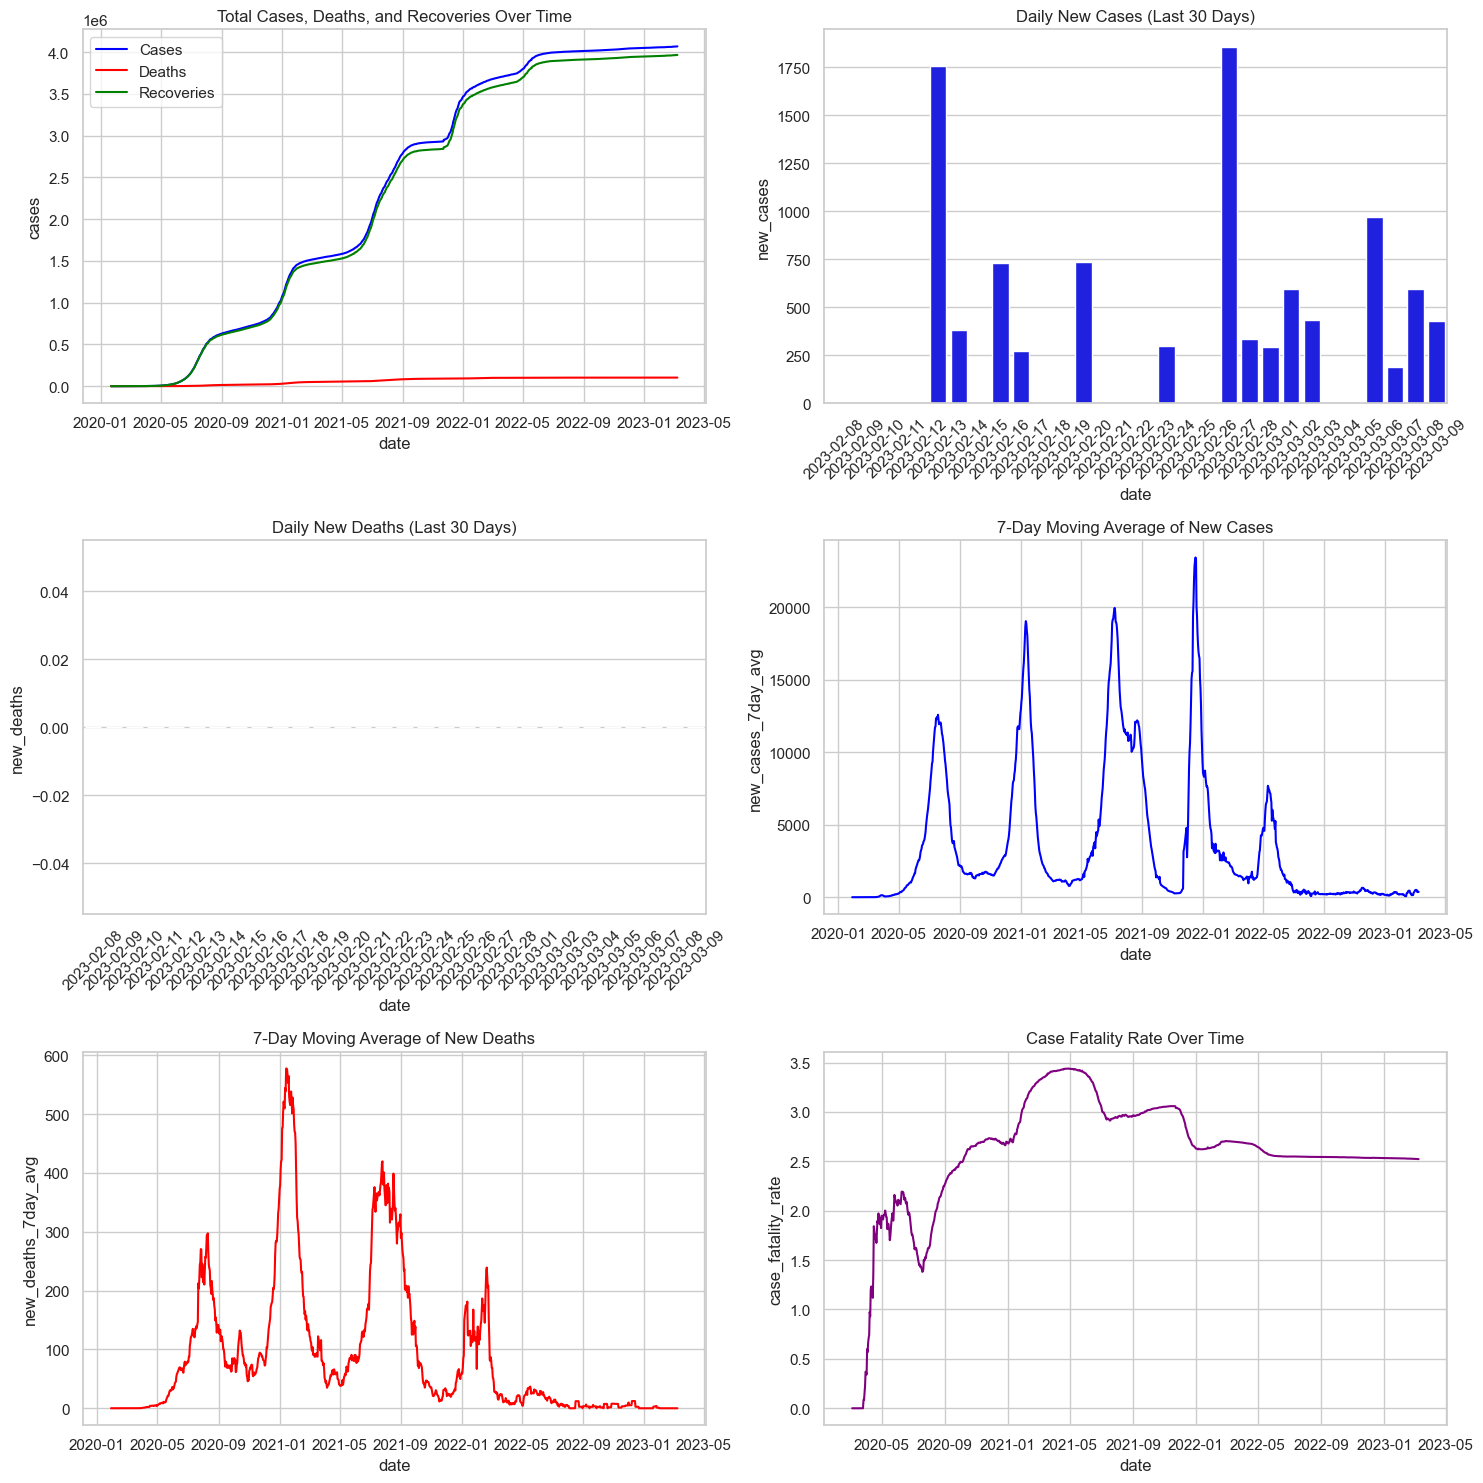

In [57]:
sns.set(style="whitegrid")
fig, axes = plt.subplots(3, 2, figsize=(15, 15))

# Total cases, deaths, and recoveries over time    
sns.lineplot(ax=axes[0, 0], x='date', y='cases', data=df, label='Cases', color='blue')
sns.lineplot(ax=axes[0, 0], x='date', y='deaths', data=df, label='Deaths', color='red')
sns.lineplot(ax=axes[0, 0], x='date', y='recoveries', data=df, label='Recoveries', color='green')
axes[0, 0].set_title('Total Cases, Deaths, and Recoveries Over Time')
axes[0, 0].legend()

# Daily new deaths
sns.barplot(ax=axes[1, 0], x='date', y='new_deaths', data=df.tail(30), color='red')
axes[1, 0].set_title('Daily New Deaths (Last 30 Days)')
axes[1, 0].tick_params(axis='x', rotation=45)

# Daily new cases
sns.barplot(ax=axes[0, 1], x='date', y='new_cases', data=df.tail(30), color='blue')
axes[0, 1].set_title('Daily New Cases (Last 30 Days)')
axes[0, 1].tick_params(axis='x', rotation=45)


# 7-day moving average of new cases
sns.lineplot(ax=axes[1, 1], x='date', y='new_cases_7day_avg', data=df, color='blue')
axes[1, 1].set_title('7-Day Moving Average of New Cases')

# 7-day moving average of new deaths
sns.lineplot(ax=axes[2, 0], x='date', y='new_deaths_7day_avg', data=df, color='red')
axes[2, 0].set_title('7-Day Moving Average of New Deaths')

# Case fatality rate over time
sns.lineplot(ax=axes[2, 1], x='date', y='case_fatality_rate', data=df, color='purple')
axes[2, 1].set_title('Case Fatality Rate Over Time')


plt.tight_layout()
plt.show()


